In [0]:
!pip install tabula-py
!pip install PyPDF2
!wget https://www.nichd.nih.gov/sites/default/files/inline-files/FGCalculatorPercentileRange.pdf # linux
# !curl -o /Users/laut/Downloads/FGCalculatorPercentileRange.pdf https://www.nichd.nih.gov/sites/default/files/inline-files/FGCalculatorPercentileRange.pdf # osx

In [0]:
import pandas as pd
import tabula as tp
import PyPDF2 as ppdf

In [0]:
def foo(path):
    df_list = []
    for i in range(1,len(ppdf.PdfReader(stream=path).pages) + 1):
        df0 = tp.read_pdf(input_path=path, pages=i)[0]
        df_list.append(df0)
    df1 = pd.concat(df_list)
    df1.columns = [x.replace("\r", "_").replace(" ", "_").lower() for x in df1.columns]
    return df1

df1 = foo(path='/Workspace/Users/laut@churchofjesuschrist.org/FGCalculatorPercentileRange.pdf')

In [0]:
df1.to_csv(path_or_buf="/Workspace/Users/laut@churchofjesuschrist.org/fetalgrowthcalculatorpercentilerange.tsv", sep="\t", index=False)

In [0]:
%r
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyr")
install.packages("readr")


Warning in .complete__("install", 7) :
  restarting interrupted promise evaluation
* installing *source* package ‘dplyr’ ...
** package ‘dplyr’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C++ compiler: ‘g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0’
g++ -std=gnu++17 -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -ffile-prefix-map=/build/r-base-H0vbME/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c chop.cpp -o chop.o
g++ -std=gnu++17 -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -ffile-prefix-map=/build/r-base-H0vbME/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c filter.cpp -o filter.o
g++ -std=gnu++17 -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -ffile-prefix-map=/build/r-base-H0vbME/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c funs.cpp -o 

In [0]:
%r
library(dplyr)
library(ggplot2)

In [0]:
%r
d0 <- readr::read_tsv(file = "/Workspace/Users/laut@churchofjesuschrist.org/fetalgrowthcalculatorpercentilerange.tsv")
d1 <- d0 %>% 
  tidyr::pivot_longer(cols = -c(`gestational_age_(weeks)`, race, measure), names_to = "percentile", values_to = "value")

Rows: 3600 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): race, measure
dbl (8): gestational_age_(weeks), 3rd_percentile, 5th_percentile, 10th_perce...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

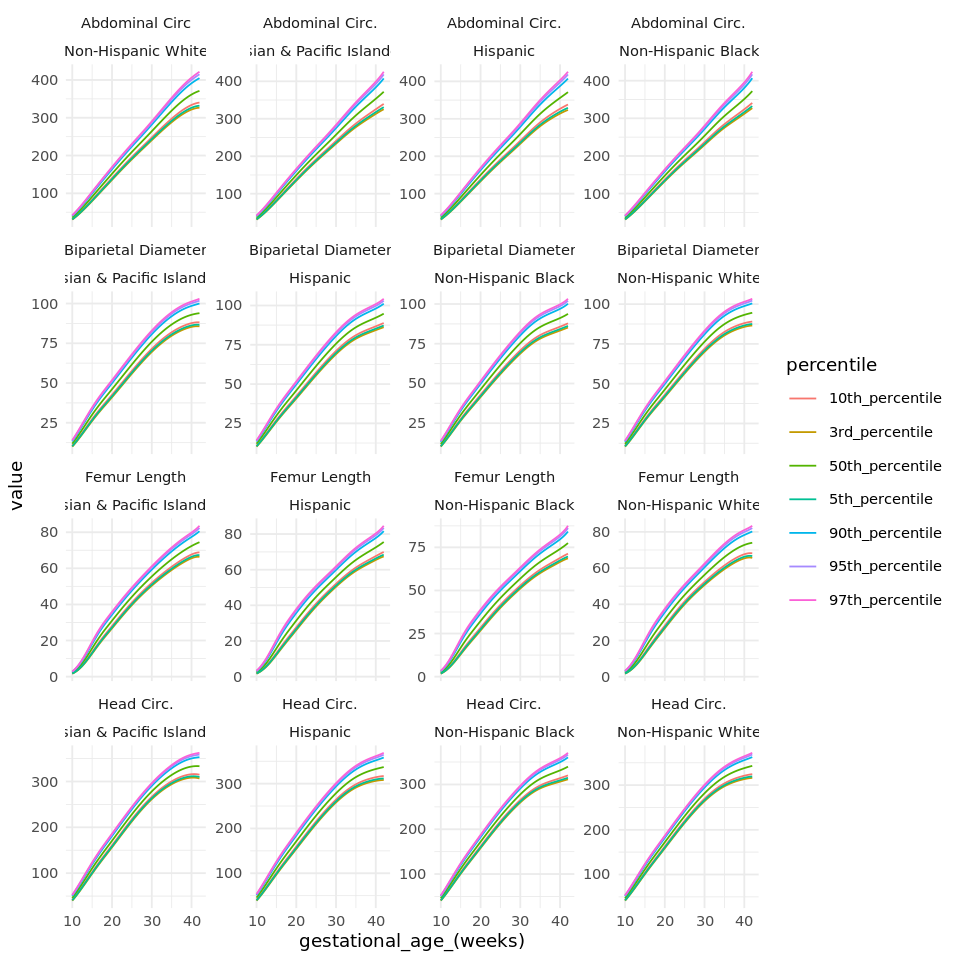

In [0]:
%r
d1 %>% 
  ggplot(mapping = aes(x = `gestational_age_(weeks)`, y = value, group = percentile, color = percentile)) +
  geom_line() +
  facet_wrap(facets = ~ measure + race, scales = "free_y") +
  theme_minimal()

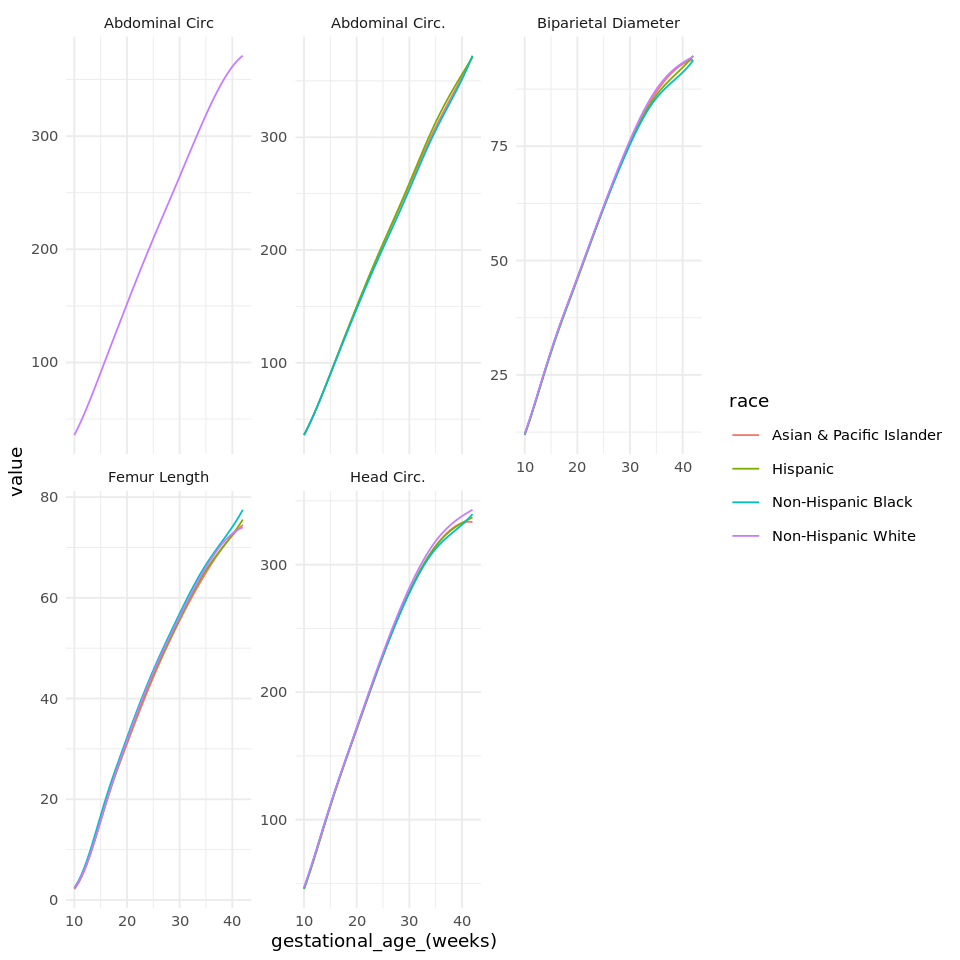

In [0]:
%r
d1 %>% 
  filter(percentile == "50th_percentile") %>% 
  ggplot(mapping = aes(x = `gestational_age_(weeks)`, y = value, group = race, color = race)) +
  geom_line() +
  facet_wrap(facets = ~ measure, scales = "free_y") +
  theme_minimal()